# 🐾 Step 2-3: Data Loading & Visualization

In this notebook, we will:
1. Use **ImageDataGenerator** to load images
2. Understand how data flows to our model
3. Visualize augmented images

## 2.1 Setup

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Paths
DATA_DIR = "../data"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VALID_DIR = os.path.join(DATA_DIR, "valid")
TEST_DIR = os.path.join(DATA_DIR, "test")

# Image settings
IMG_SIZE = (224, 224)  # Standard size for CNNs
BATCH_SIZE = 16        # How many images to process at once

## 2.2 What is ImageDataGenerator?

**ImageDataGenerator** does two things:
1. **Loads images** from folders automatically
2. **Augments images** (rotates, flips, zooms) to create variety

This helps our model learn better with limited data!

In [2]:
# Training data generator WITH augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to 0-1
    rotation_range=20,        # Rotate up to 20 degrees
    horizontal_flip=True,     # Flip left-right
    vertical_flip=True,       # Flip up-down
    zoom_range=0.2,           # Zoom in/out by 20%
    brightness_range=[0.8, 1.2]  # Vary brightness
)

# Validation/Test data - NO augmentation, only rescale
valid_datagen = ImageDataGenerator(rescale=1./255)

print("Data generators created!")

Data generators created!


## 2.3 Load the Data

`flow_from_directory` automatically:
- Finds all images in subfolders
- Uses folder names as class labels
- Resizes images to our target size

In [3]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # One-hot encoded labels
)

# Load validation data
valid_generator = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load test data
test_generator = valid_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../data\\train'

In [ ]:
# See the class mapping
print("Class indices:", train_generator.class_indices)
print(f"\nNumber of classes: {train_generator.num_classes}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {valid_generator.samples}")
print(f"Test samples: {test_generator.samples}")

Class indices: {'domestic_cat': 0, 'domestic_dog': 1, 'european_badger': 2}

Number of classes: 3
Training samples: 210
Validation samples: 31
Test samples: 61


## 2.4 Understanding Batches

The generator gives us **batches** of images:
- Each batch = 16 images (our BATCH_SIZE)
- Images are tensors of shape (224, 224, 3)
- Labels are one-hot encoded: [1,0,0] = cat, [0,1,0] = dog, [0,0,1] = badger

In [ ]:
# Get one batch to inspect
images, labels = next(train_generator)

print(f"Batch shape: {images.shape}")
print(f"  - {images.shape[0]} images")
print(f"  - Each image is {images.shape[1]}x{images.shape[2]} pixels")
print(f"  - {images.shape[3]} color channels (RGB)")
print(f"\nLabels shape: {labels.shape}")
print(f"Example label: {labels[0]} (one-hot encoded)")

Batch shape: (16, 224, 224, 3)
  - 16 images
  - Each image is 224x224 pixels
  - 3 color channels (RGB)

Labels shape: (16, 3)
Example label: [1. 0. 0.] (one-hot encoded)


## 2.5 Visualize Augmented Images

Let's see how augmentation creates variations of the same image!

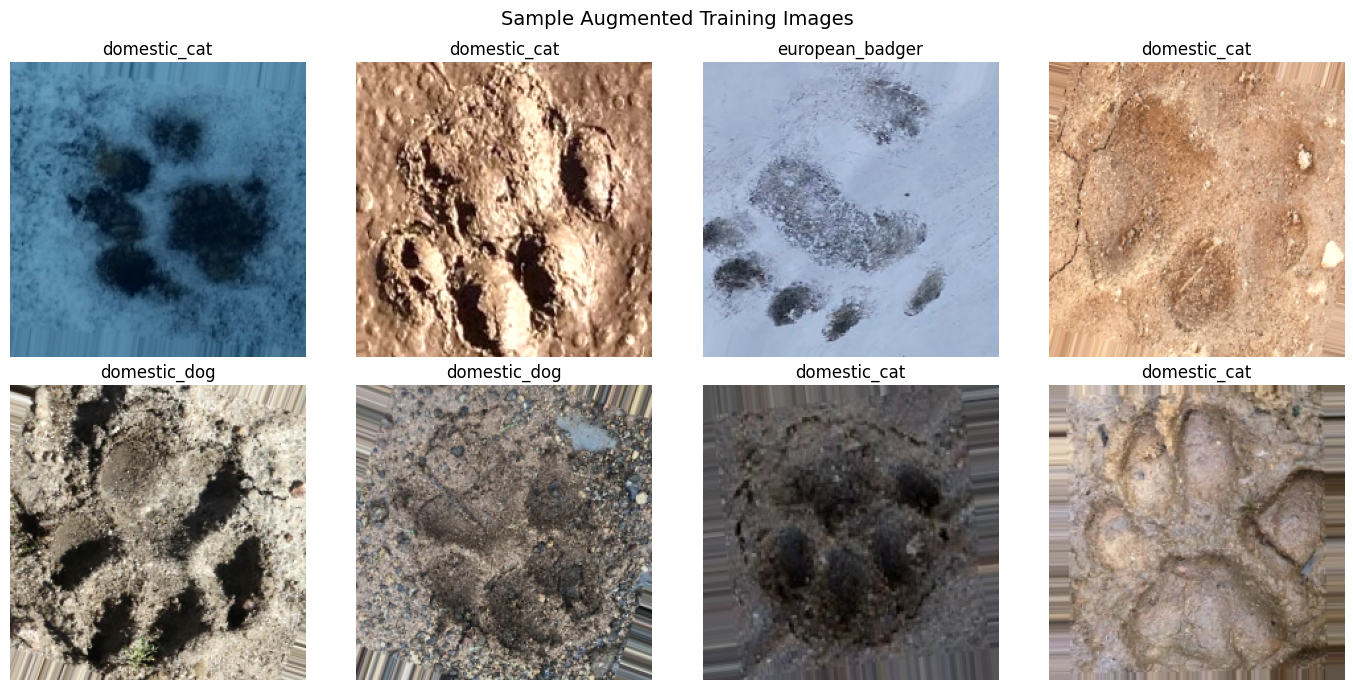

In [ ]:
# Get class names in correct order
class_names = list(train_generator.class_indices.keys())

# Display a batch of augmented images
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
axes = axes.flatten()

for i in range(8):
    axes[i].imshow(images[i])
    # Get class name from one-hot label
    class_idx = np.argmax(labels[i])
    axes[i].set_title(class_names[class_idx])
    axes[i].axis('off')

plt.suptitle("Sample Augmented Training Images", fontsize=14)
plt.tight_layout()
plt.show()

## 2.6 See Augmentation in Action

Let's apply augmentation multiple times to ONE image to see the variations:

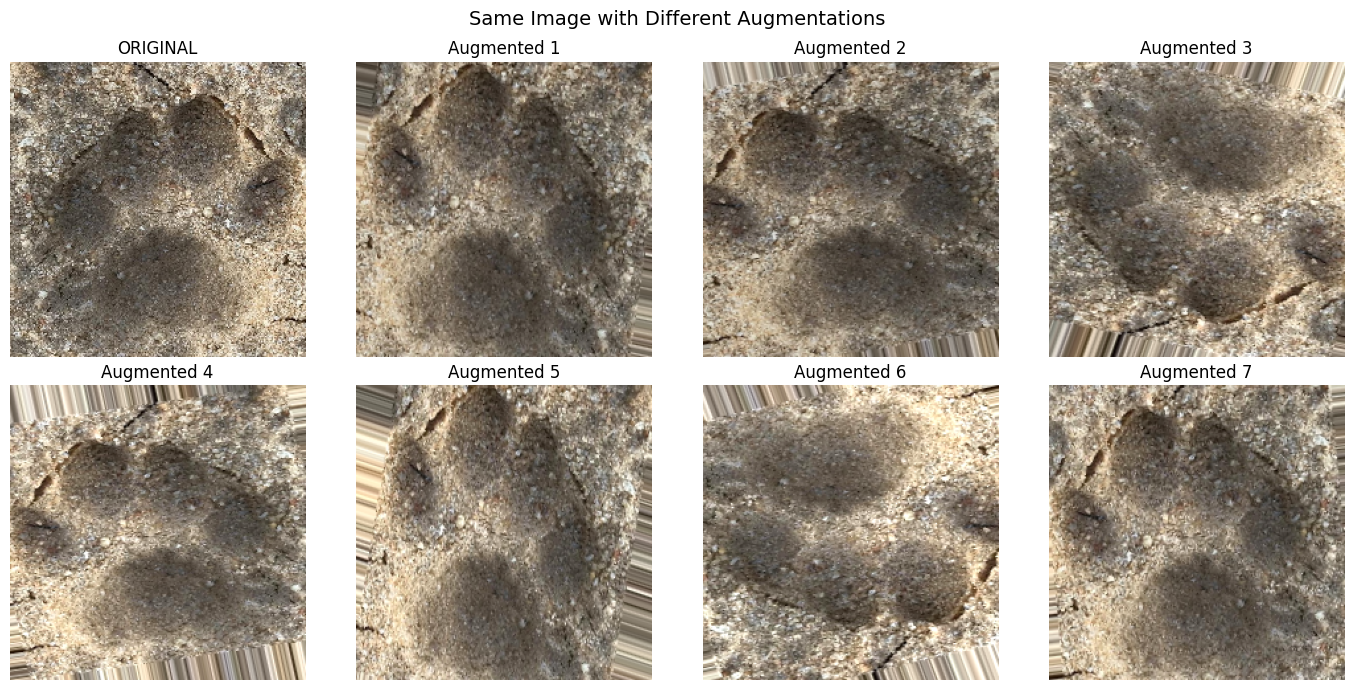

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load one sample image
sample_path = os.path.join(TRAIN_DIR, "domestic_cat", os.listdir(os.path.join(TRAIN_DIR, "domestic_cat"))[0])
sample_img = load_img(sample_path, target_size=IMG_SIZE)
sample_array = img_to_array(sample_img)
sample_array = sample_array.reshape((1,) + sample_array.shape)  # Add batch dimension

# Generate augmented versions
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
axes = axes.flatten()

# Original
axes[0].imshow(sample_img)
axes[0].set_title("ORIGINAL")
axes[0].axis('off')

# Augmented versions
aug_generator = train_datagen.flow(sample_array, batch_size=1)
for i in range(1, 8):
    augmented = next(aug_generator)[0]
    axes[i].imshow(augmented)
    axes[i].set_title(f"Augmented {i}")
    axes[i].axis('off')

plt.suptitle("Same Image with Different Augmentations", fontsize=14)
plt.tight_layout()
plt.show()

## ✅ Steps 2-3 Complete!

**What we learned:**
- **ImageDataGenerator** loads images from folders and applies augmentation
- **Batches** are groups of images fed to the model together
- **Augmentation** creates variations (rotations, flips, zooms) to help the model generalize
- **Normalization** (rescale=1./255) converts pixel values from 0-255 to 0-1

**Why this matters:**
- With only ~100 training images, augmentation helps prevent overfitting
- The model sees different versions of each image, learning to recognize footprints regardless of orientation

**Next step:** Build our CNN model!